In [ ]:
# Sentiment analysis for parsing tweets

In [ ]:
# Importing libraries
import tweepy, re
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [ ]:
# Authentications
accessToken = "2263896421-XNvedvIAmfLlT35Mwdc4SUQkTtR3aEWbODUtL6q"
accessTokenSecret = "7XIMB8MKgnwoakqGtkR7V2ad0mTJJUUZ5PKE2WHeYihOy"
consumerKey = "4q7U71Ijvxlzjf9rRaR9k1RH9"
consumerSecret = "XGhdWpBJGb5TWeFebkEU1sYsckvHeoLkxhOE84VXJq0Q1JfcFY"

In [ ]:
# Create authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set access tokens
authenticate.set_access_token(accessToken, accessTokenSecret)

# Creating API obj passing in auth info
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [ ]:
# Extract 100 tweets from user
posts = api.user_timeline(screen_name="elonmusk", count=100, lnag="en", tweet_mode="extended")

# Printng last 5 tweets from acc
print("Showing last 5 recent tweets: \n")
for tweet in posts[0:5]:
  print(tweet.full_text + '\n')

Showing last 5 recent tweets: 

@JeffBezos Great idea

@BLKMDL3 Coming soon

@tesla_raj Exciting times ahead

@pmarca Disconnected from what it takes to make stuff

@teslaownersSV I’m serious about this one btw



In [ ]:
for tweet in tweepy.Cursor(api.search, q='#TheBatman', rpp=100).items(10):
    # Do something
    print(tweet.text + '\n' )

data = pd.DataFrame( [tweet.text for tweet in tweepy.Cursor(api.search, q='#TheBatman', rpp=100).items(10)], columns = ['Tweets'])
data

RT @LateNightSeth: TONIGHT: @SethMeyers welcomes @MSNBC’s @chrislhayes, Paul Dano of #TheBatman and musical guest @lucydacus! https://t.co/…

RT @every0nes_uncle: just somethin' simple cause my brain is fried

#TheBatman #Riddler #Joker https://t.co/OeVGZEIFM9

RT @every0nes_uncle: just somethin' simple cause my brain is fried

#TheBatman #Riddler #Joker https://t.co/OeVGZEIFM9

RT @DCU_Direct: #TheBatman will officially begin streaming on HBO Max on Monday, April 18! Details: https://t.co/GdUgwmPnVg https://t.co/4d…

RT @akanebat: #TheBatman https://t.co/AHKCYHkdfk

RT @Nerdmigos: En este episodio del #podcast #Nerdmigos tuvimos como invitado a @El_Sinpay de @royaleconques0 🤓🎙️🤘🇲🇽

¡Escúchalo hoy! 🎧 htt…

RT @TaurooAldebaran: Anniversary meeting #TheBatman 
fantastic work by Hugo Dourado. https://t.co/qkUmdt92AN

RT @every0nes_uncle: just somethin' simple cause my brain is fried

#TheBatman #Riddler #Joker https://t.co/OeVGZEIFM9

This date has been changed! It'll now release earlier 

,Tweets
0,RT @LateNightSeth: TONIGHT: @SethMeyers welcom...
1,RT @every0nes_uncle: just somethin' simple cau...
2,RT @every0nes_uncle: just somethin' simple cau...
3,RT @DCU_Direct: #TheBatman will officially beg...
4,RT @akanebat: #TheBatman https://t.co/AHKCYHkdfk
5,RT @Nerdmigos: En este episodio del #podcast #...
6,RT @TaurooAldebaran: Anniversary meeting #TheB...
7,RT @every0nes_uncle: just somethin' simple cau...
8,This date has been changed! It'll now release ...
9,RT @DiscussingFilm: #TheBatman will release on...


In [ ]:
# Extract 100 tweets from user
# posts = api.user_timeline(screen_name="billgates", count=100, lnag="en", tweet_mode="extended")

# posts = for tweet in tweepy.Cursor(api.search, q='#TheBatman', rpp=100).items(100)]

# # Printng last 5 tweets from acc
# print("Showing last 5 recent tweets: \n")
# i = 1
# for tweet in posts[0:5]:
#   print(str(i) + ') ' + tweet.full_text + '\n')
#   i = i + 1

In [ ]:
# Create a dataframe with column for tweets
df = pd.DataFrame( [tweet.text for tweet in tweepy.Cursor(api.search, q='#TheBatman', lang="en", rpp=100).items(100)], columns = ['Tweets'])

# Showing 1st 5 rows of data
df

,Tweets
0,RT @hbomax: Vengeance is coming. \n\nStream #T...
1,RT @clambatch: i was so right for this #TheBat...
2,RT @juxXOXO: #TheRiddler \n#TheBatman \nDoodle...
3,RT @OTTSandeep: #TheBatman will premiere on Bo...
4,RT @every0nes_uncle: just somethin' simple cau...
...,...
95,RT @every0nes_uncle: just somethin' simple cau...
96,RT @clambatch: i was so right for this #TheBat...
97,RT @CultureCrave: #TheBatman releases on HBO M...
98,RT @Bat_Source: #TheBatman physical release wi...


In [ ]:
# Cleaning the text

# function to clean the text
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9_]+', "", text) # removing @ mentions
  text = re.sub(r'#[A-Za-z0-9]+', '', text) # removing @ mentions
  text = re.sub(r'RT[\s]+', '', text) # removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) # removing hyperlink
  text = re.sub(r':+', '', text) # removing RT
  

  return text

df['Tweets'] = df['Tweets'].apply(cleanText)

# show clenaned text
df

,Tweets
0,Vengeance is coming. \n\nStream on HBO Max i...
1,i was so right for this
2,\n \nDoodle
3,will premiere on BookMyShow Stream on April ...
4,just somethin' simple cause my brain is fried...
...,...
95,just somethin' simple cause my brain is fried...
96,i was so right for this
97,releases on HBO Max in one week 🦇
98,physical release will feature a behind the s...


In [ ]:
from nltk.text import Text
# Create a function to get subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Get polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Making new columns for subjectivity and polarity
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,Vengeance is coming. \n\nStream on HBO Max i...,0.000000,0.000000
1,i was so right for this,0.535714,0.285714
2,\n \nDoodle,0.000000,0.000000
3,will premiere on BookMyShow Stream on April ...,0.000000,0.000000
4,just somethin' simple cause my brain is fried...,0.357143,0.000000
...,...,...,...
95,just somethin' simple cause my brain is fried...,0.357143,0.000000
96,i was so right for this,0.535714,0.285714
97,releases on HBO Max in one week 🦇,0.000000,0.000000
98,physical release will feature a behind the s...,0.421429,-0.200000


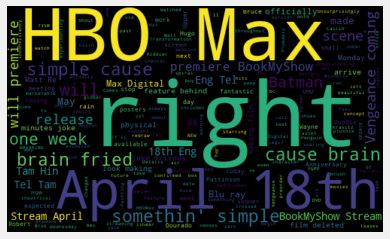

In [ ]:
# Plot Word Cloud
allWords = ' '.join( [twts for twts in df["Tweets"]] )
wordCloud = WordCloud(width=500, height=300, random_state = 21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# function to compute neg, pos and neutral analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score > 0:
    return 'Positive'
  else:
    return 'Neutral'

df['Analysis'] = df["Polarity"].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Vengeance is coming. \n\nStream on HBO Max i...,0.000000,0.000000,Neutral
1,i was so right for this,0.535714,0.285714,Positive
2,\n \nDoodle,0.000000,0.000000,Neutral
3,will premiere on BookMyShow Stream on April ...,0.000000,0.000000,Neutral
4,just somethin' simple cause my brain is fried...,0.357143,0.000000,Neutral
...,...,...,...,...
95,just somethin' simple cause my brain is fried...,0.357143,0.000000,Neutral
96,i was so right for this,0.535714,0.285714,Positive
97,releases on HBO Max in one week 🦇,0.000000,0.000000,Neutral
98,physical release will feature a behind the s...,0.421429,-0.200000,Negative


In [ ]:
# print all the positive tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending="True")
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
     print(str(j) + ') ' + sortedDF['Tweets'][i])
     print()
     j = j+1
sortedDF

1)  i was so right for this  

2)  i was so right for this  

3)  Unsurprisingly, the concept art for the scene is just as beautiful as the scene itself!
 

4)  i was so right for this  

5)  i was so right for this  

6)  i was so right for this  

7)  i was so right for this  

8)  The Riddler always has a very nice choice of shoes

(Upper left The Batman; Upper right Batman The Bat And The Cat…

9)  i was so right for this  

10)  i was so right for this  

11)  i was so right for this  

12)  The same day  hits HBO Max, April 18, it’ll also be available to buy on Digital. On May 24, the 4K, Blu-ray,…

13)  i was so right for this  

14)  i was so right for this  

15)  i was so right for this  

16)  i was so right for this  

17)  i was so right for this  

18)  i was so right for this  

19)  i was so right for this  

20)  UPDATE

THE BATMAN on 4K UHD Blu-ray, coming May 24, is now available for preorder over at Amazon.   
…

21)  i was so right for this  

22)  Vengeance is com

,Tweets,Subjectivity,Polarity,Analysis
9,physical release will feature a behind the s...,0.421429,-0.200,Negative
84,physical release will feature a behind the s...,0.421429,-0.200,Negative
98,physical release will feature a behind the s...,0.421429,-0.200,Negative
65,Vengeance is coming to the small screen soone...,0.400000,-0.175,Negative
74,Vengeance is coming to the small screen soone...,0.400000,-0.175,Negative
...,...,...,...,...
46,"UPDATE\n\nTHE BATMAN on 4K UHD Blu-ray, comin...",0.400000,0.400,Positive
72,Warner Bros. has just confirmed that THE BATM...,1.000000,0.400,Positive
89,Anniversary meeting \nfantastic work by Hugo...,0.900000,0.400,Positive
68,Anniversary meeting \nfantastic work by Hugo...,0.900000,0.400,Positive


In [ ]:
# print all the negative tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending = 'False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
     print(str(j) + ') ' + sortedDF['Tweets'][i])
     print()
     j = j+1

1)   physical release will feature a behind the scenes look at the making of the film and deleted scenes with Matt Re…

2)  Vengeance is coming to the small screen sooner than expected.   

3)  Vengeance is coming to the small screen sooner than expected.   

4)  NEW  arrives at home one week from today. The film just crossed $735M at the global box office this past weekend.…

5)   physical release will feature a behind the scenes look at the making of the film and deleted scenes with Matt Re…

6)   physical release will feature a behind the scenes look at the making of the film and deleted scenes with Matt Re…



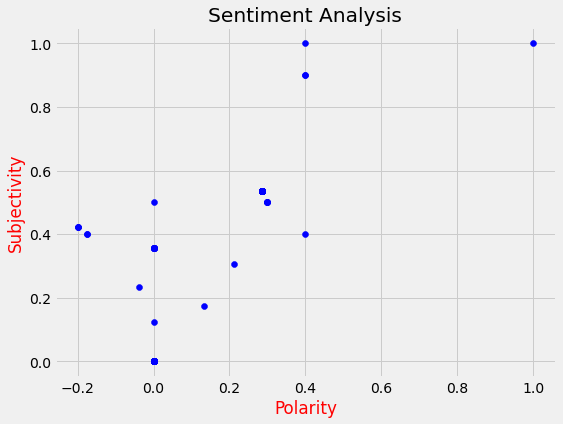

In [ ]:
# plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity', color='red')
plt.ylabel('Subjectivity', color='red')
plt.show()

In [ ]:
# Percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100, 1)

39.0

In [ ]:
# Percentage of negative tweets
ptweets = df[df.Analysis == 'Negative']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100, 1)

6.0

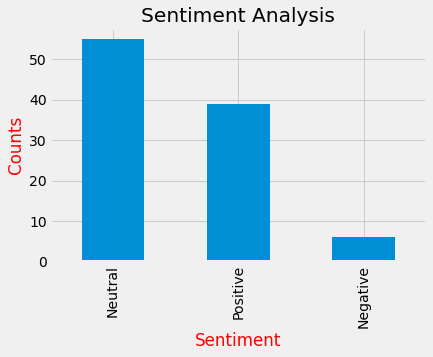

In [ ]:
# show the value counts

df['Analysis'].value_counts()

# plot and visualize
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment', color='red')
plt.ylabel('Counts', color='red')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()